## **Load and Preprocess the Data**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


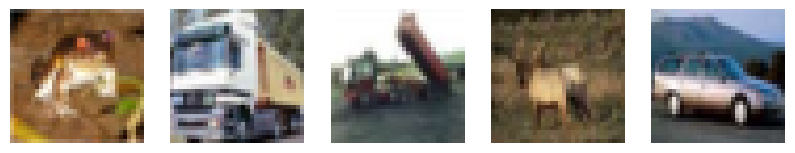

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualize some examples from the dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i])
    ax.axis('off')
plt.show()


## **Define the CNN Architecture**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Block
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Compile the Model**

In [3]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## **Train the Model**

In [4]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=25,
    verbose=1
)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 483ms/step - accuracy: 0.3721 - loss: 2.1269 - val_accuracy: 0.5639 - val_loss: 1.2117
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 485ms/step - accuracy: 0.5758 - loss: 1.2042 - val_accuracy: 0.6069 - val_loss: 1.1449
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 485ms/step - accuracy: 0.6547 - loss: 0.9909 - val_accuracy: 0.6845 - val_loss: 0.9084
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 387s 491ms/step - accuracy: 0.7043 - loss: 0.8596 - val_accuracy: 0.6670 - val_loss: 0.9877
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 435s 483ms/step - accuracy: 0.7276 - loss: 0.7913 - val_accuracy: 0.7169 - val_loss: 0.8353
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 384s 485ms/step - accuracy: 0.7478 - loss: 0.7227 - val_accuracy: 0.7680 - val_loss: 0.6727
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 389s 494ms/step - accuracy: 0.7678 - loss: 0.6674 - val_accuracy: 0.7700 - val_loss: 0.6632
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 437s 488ms/step - accuracy: 0.7916 -

## **Evaluate the Model**

In [5]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Accuracy: 77.90%


## **Visualize Training Performance**

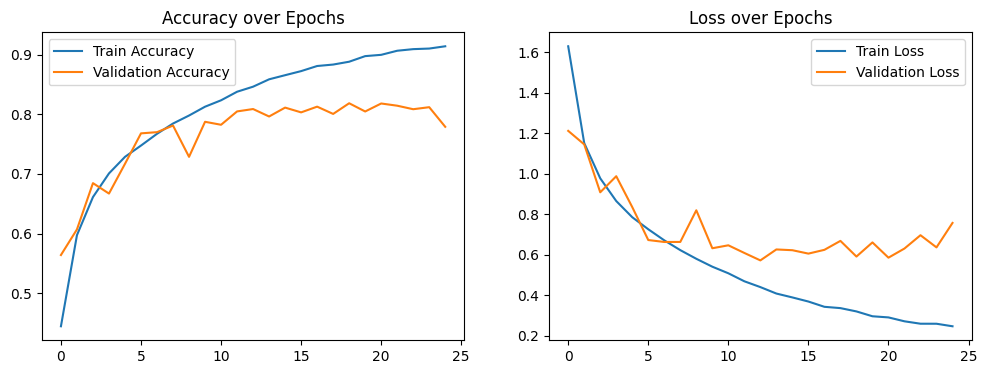

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

## **Add Data Augmentation**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,       # Randomly rotate images by up to 15 degrees
    width_shift_range=0.1,   # Randomly shift images horizontally by 10%
    height_shift_range=0.1,  # Randomly shift images vertically by 10%
    horizontal_flip=True     # Randomly flip images horizontally
)

# Fit the generator to the training data
datagen.fit(X_train)

# Train the model using the augmented data generator
history_aug = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=25,
    verbose=1
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 412s 524ms/step - accuracy: 0.7183 - loss: 0.8474 - val_accuracy: 0.7783 - val_loss: 0.6950
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 421s 538ms/step - accuracy: 0.7554 - loss: 0.7213 - val_accuracy: 0.7957 - val_loss: 0.6187
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 404s 516ms/step - accuracy: 0.7698 - loss: 0.6804 - val_accuracy: 0.7955 - val_loss: 0.6407
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 458s 586ms/step - accuracy: 0.7754 - loss: 0.6480 - val_accuracy: 0.7853 - val_loss: 0.6713
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 453s 523ms/step - accuracy: 0.7761 - loss: 0.6431 - val_accuracy: 0.7919 - val_loss: 0.6142
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 461s 547ms/step - accuracy: 0.7853 - loss: 0.6305 - val_accuracy: 0.7811 - val_loss: 0.6803
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 414s 528ms/step - accuracy: 0.7912 - loss: 0.6107 - val_accuracy: 0.8175 - val_loss: 0.5511
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 435s 519ms/step - accuracy: 0.7916 - loss: 0.60

## **Enhance the CNN Architecture**

In [8]:
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fully Connected Block
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Experiment with Learning Rate Schedulers**

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Add a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',   # Reduce learning rate if validation loss stops improving
    factor=0.5,           # Reduce by half
    patience=3,           # Wait for 3 epochs without improvement
    min_lr=1e-6           # Set a lower bound for the learning rate
)

# Compile the model again
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train with the scheduler
history_aug = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=50,  # Train for more epochs to utilize the scheduler
    callbacks=[lr_scheduler],
    verbose=1
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 523s 661ms/step - accuracy: 0.3155 - loss: 2.1073 - val_accuracy: 0.3971 - val_loss: 1.7857 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 563s 662ms/step - accuracy: 0.4940 - loss: 1.3951 - val_accuracy: 0.5846 - val_loss: 1.1914 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 523s 669ms/step - accuracy: 0.5702 - loss: 1.2124 - val_accuracy: 0.6196 - val_loss: 1.0998 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 523s 668ms/step - accuracy: 0.6236 - loss: 1.0785 - val_accuracy: 0.6549 - val_loss: 1.0132 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 564s 670ms/step - accuracy: 0.6574 - loss: 0.9880 - val_accuracy: 0.6932 - val_loss: 0.8802 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 531s 678ms/step - accuracy: 0.6841 - loss: 0.9261 - val_accuracy: 0.7245 - val_loss: 0.8182 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 538s 687ms/step - accura

## **Evaluate and Compare Results**

In [ ]:
# Evaluate the enhanced model
test_loss_aug, test_acc_aug = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy after Augmentation and Scheduler: {test_acc_aug * 100:.2f}%")

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_aug.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_aug.history['loss'], label='Training Loss', color='blue')